# Data Analysis for X trends
## Summary 📝
### 1. Data Understanding 
### 2. Data Analysis 
#### 2.1 Word Cloud 
#### 2.2 Engagement Trend 
#### 2.3 Top Influential Users 
#### 2.4 Top Influential Hashtags 
#### 2.5 Most Viral Tweets


# 1. Data Understanding 📊

In [ ]:
%pip install warnings 

In [ ]:
%pip install nltk 

In [30]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [31]:
df = pd.read_csv('../data_collection/X_scraping/tweets.csv')

In [32]:
# Display basic info
print("Dataset Overview:")
print(df.info())
print(df.describe())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User      333 non-null    object
 1   Date      334 non-null    object
 2   Content   334 non-null    object
 3   Hashtags  56 non-null     object
 4   Mentions  334 non-null    object
 5   Views     334 non-null    int64 
 6   Likes     334 non-null    int64 
 7   Retweets  334 non-null    int64 
 8   Replies   334 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 23.6+ KB
None
              Views         Likes     Retweets       Replies
count  3.340000e+02    334.000000   334.000000  3.340000e+02
mean   1.047574e+05   2468.248503   492.988024  1.040571e+05
std    7.184425e+05   5623.252453  1008.964867  1.897393e+06
min    0.000000e+00      0.000000     0.000000  0.000000e+00
25%    9.325000e+03    319.750000    66.000000  2.300000e+01
50%    2.650000e+04    765.000000   16

# 3. Data Analysis 🔍
## 3.1 Word Cloud 📝

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dhouh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


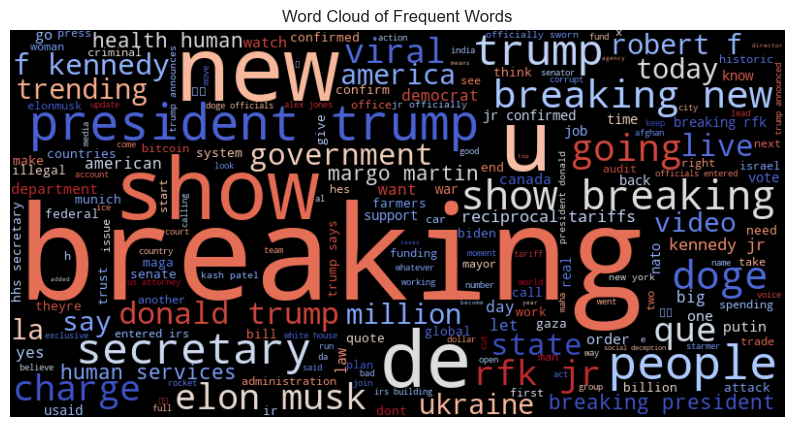

In [50]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download NLTK stopwords (only once)
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

# Function to clean text
def clean_text(text):
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
    text = re.sub(r"\d+", "", text)  # Remove numbers
    words = text.split()
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return " ".join(words)

# Apply text cleaning
df["cleaned_content"] = df["Content"].apply(clean_text)

# Combine all tweets into a single text
all_words = " ".join(df["cleaned_content"])

# Generate Word Cloud
plt.figure(figsize=(10, 6))
wordcloud = WordCloud(width=800, height=400, background_color="black", colormap="coolwarm").generate(all_words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Frequent Words")
plt.show()

## 3.2 Engagement Trend over time 📅

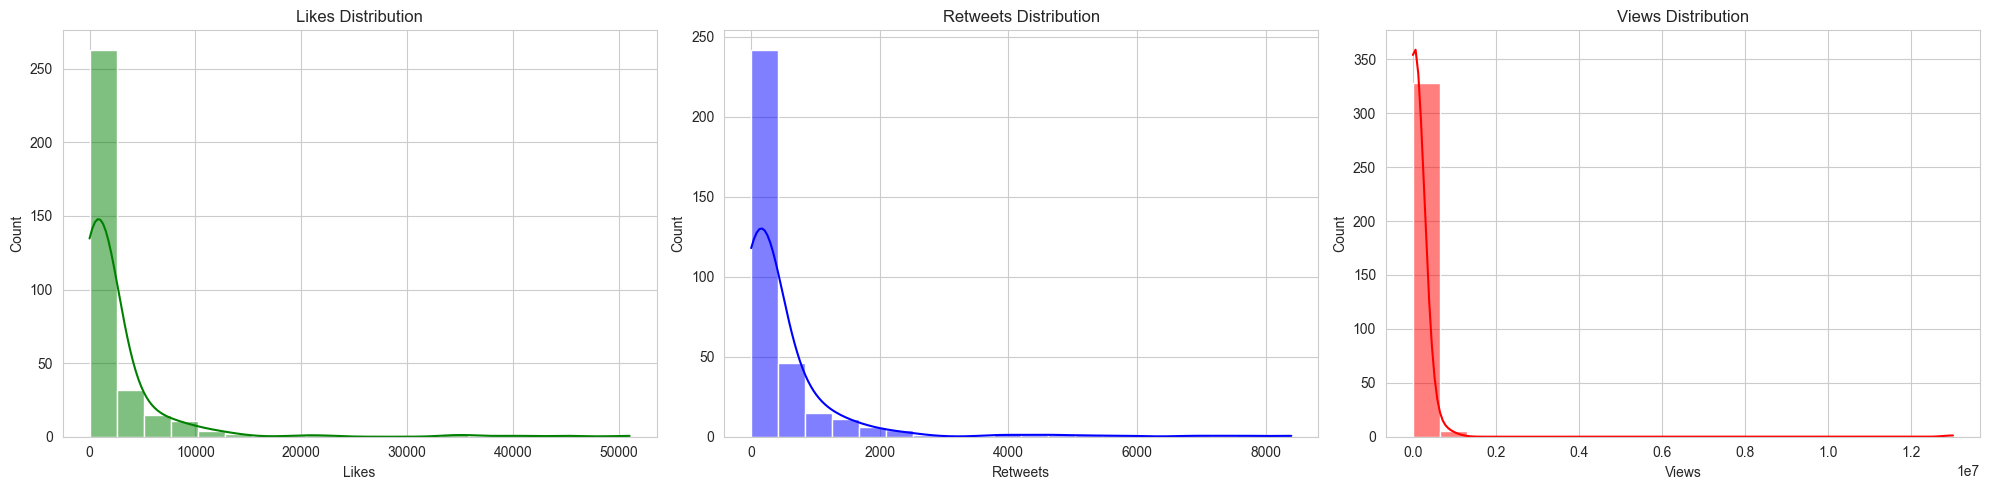

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(20, 5))

# Likes Distribution
plt.subplot(1, 3, 1)
sns.histplot(df["Likes"], bins=20, kde=True, color="green")
plt.xlabel("Likes")
plt.ylabel("Count")
plt.title("Likes Distribution")

# Retweets Distribution
plt.subplot(1, 3, 2)
sns.histplot(df["Retweets"], bins=20, kde=True, color="blue")
plt.xlabel("Retweets")
plt.ylabel("Count")
plt.title("Retweets Distribution")

# Replies Distribution
plt.subplot(1, 3, 3)
sns.histplot(df["Views"], bins=20, kde=True, color="red")
plt.xlabel("Views")
plt.ylabel("Count")
plt.title("Views Distribution")

# Adjust layout
plt.tight_layout()
plt.show()

In [40]:
# Convert to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Create new columns for Date & Time
df["Only_Date"] = df["Date"].dt.date
df["Only_Time"] = df["Date"].dt.time

df["Hour"] = df["Only_Time"].astype(str).str[:2]  # Extract first two characters (hour)
df["Hour"] = df["Hour"].astype(int)  # Convert to integer if needed

tweet = df.drop(index=230).reset_index(drop=True)

tweet["Total_Engagement"] = tweet["Likes"] + tweet["Retweets"] + tweet["Replies"]

hourly_engagement = tweet.groupby("Hour")[["Total_Engagement", "Views"]].sum().reset_index()

C:\Users\dhouh\AppData\Local\Temp\ipykernel_12392\1956840439.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hourly_engagement, x="Hour", y="Total_Engagement", palette="Blues")


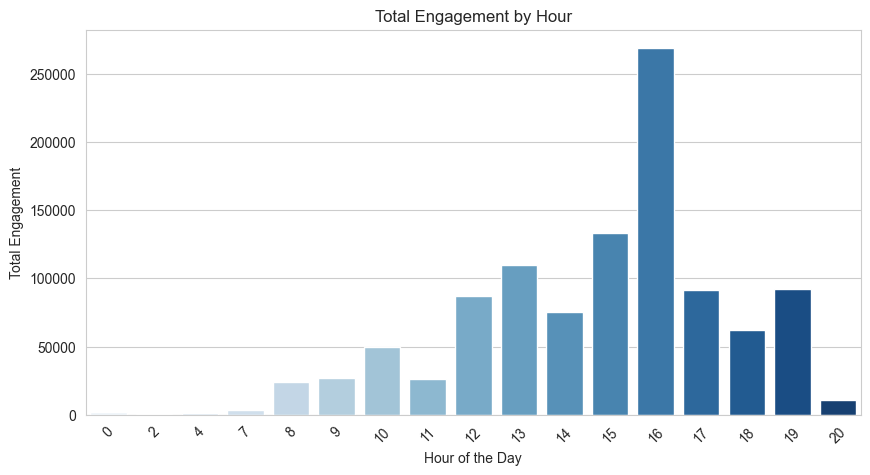

C:\Users\dhouh\AppData\Local\Temp\ipykernel_12392\1956840439.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hourly_engagement, x="Hour", y="Views", palette="Greens")


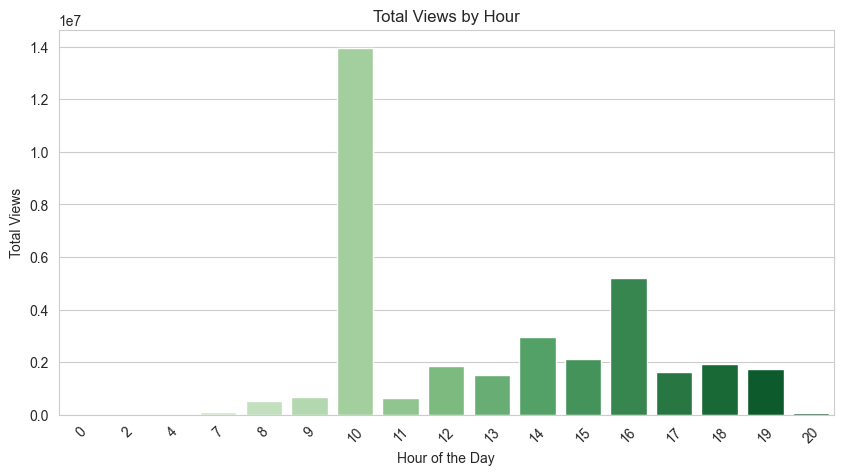

In [41]:
# Set style
sns.set_style("whitegrid")

# Plot Total Engagement per hour
plt.figure(figsize=(10, 5))
sns.barplot(data=hourly_engagement, x="Hour", y="Total_Engagement", palette="Blues")
plt.xlabel("Hour of the Day")
plt.ylabel("Total Engagement")
plt.title("Total Engagement by Hour")
plt.xticks(rotation=45)
plt.show()

# Plot Views per hour
plt.figure(figsize=(10, 5))
sns.barplot(data=hourly_engagement, x="Hour", y="Views", palette="Greens")
plt.xlabel("Hour of the Day")
plt.ylabel("Total Views")
plt.title("Total Views by Hour")
plt.xticks(rotation=45)
plt.show()
warnings.filterwarnings('ignore')

## 3.3 Top hashtags  👥

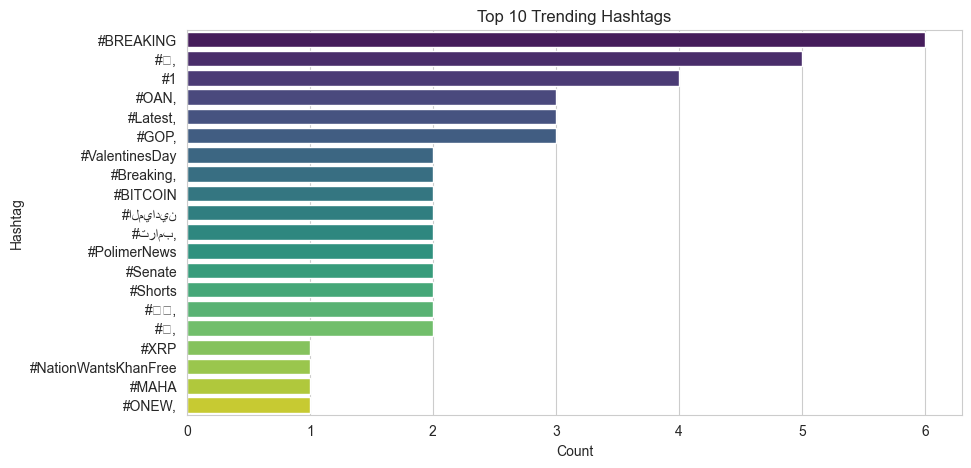

In [43]:
from collections import Counter
import seaborn as sns
plt.figure(figsize = (10,5))
# Flatten all hashtags into a single list
all_hashtags = [tag for tags in df["Hashtags"].dropna() for tag in tags.split()]
top_hashtags = Counter(all_hashtags).most_common(20)

# Convert to DataFrame for visualization
hashtags_df = pd.DataFrame(top_hashtags, columns=["Hashtag", "Count"])

sns.barplot(x="Count", y="Hashtag", data=hashtags_df, palette="viridis")
plt.title("Top 10 Trending Hashtags")
plt.show()
warnings.filterwarnings('ignore')

## 3.4 Top Influential Users 👥


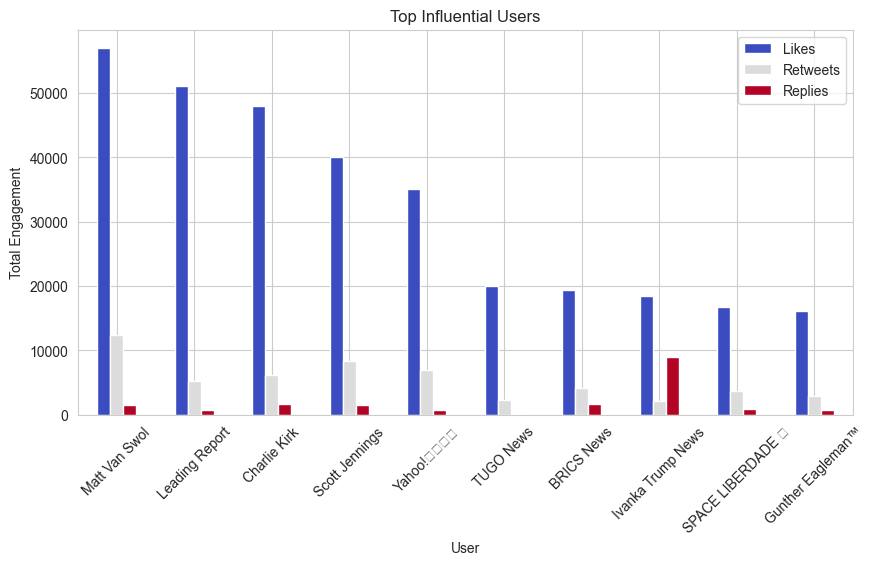

In [44]:
top_users = df.groupby("User")[["Likes", "Retweets", "Replies"]].sum().sort_values(by="Likes", ascending=False).head(10)

top_users.plot(kind="bar", figsize=(10,5), colormap="coolwarm")
plt.title("Top Influential Users")
plt.ylabel("Total Engagement")
plt.xticks(rotation=45)
plt.show()
warnings.filterwarnings('ignore')

In [56]:
# Ensure Retweets, Likes, and Replies are numeric
df["Retweets"] = pd.to_numeric(df["Retweets"], errors="coerce").fillna(0)
df["Likes"] = pd.to_numeric(df["Likes"], errors="coerce").fillna(0)
df["Replies"] = pd.to_numeric(df["Replies"], errors="coerce").fillna(0)

# Compute Virality Score
df["Virality Score"] = df["Retweets"] / (df["Likes"] + df["Replies"] + 1)

# Sort by highest virality
top_viral = df.sort_values(by="Virality Score", ascending=False).head(10)

## 3.5 Most Viral Tweets 🏆

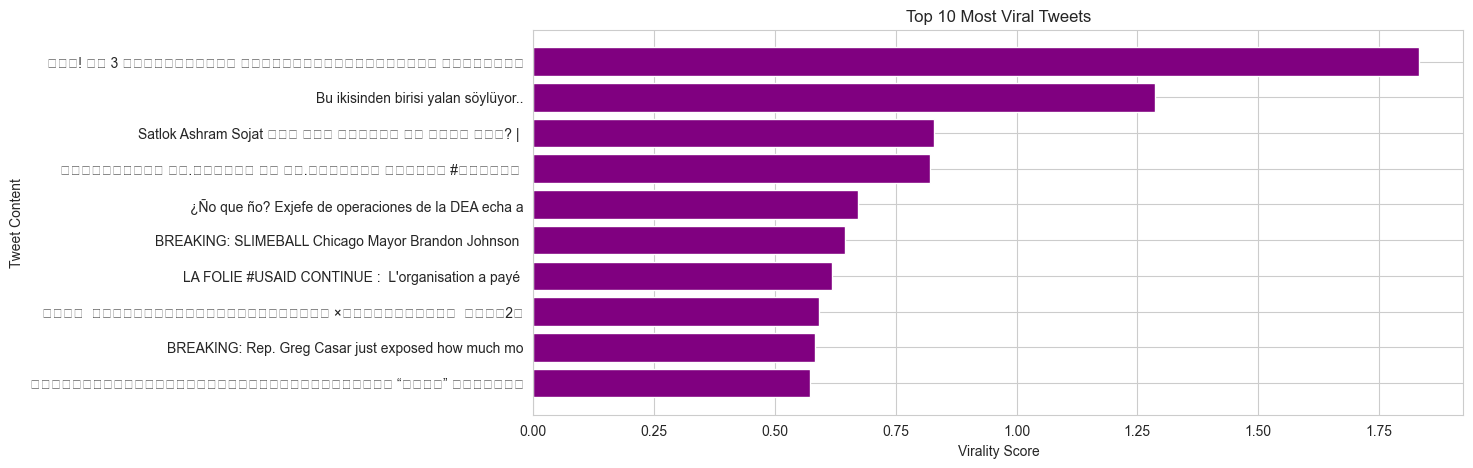

In [57]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import os


# Create the plot
plt.figure(figsize=(12, 5))
plt.barh(top_viral["Content"].str[:50], top_viral["Virality Score"], color="purple")
plt.xlabel("Virality Score")
plt.ylabel("Tweet Content")
plt.title("Top 10 Most Viral Tweets")
plt.gca().invert_yaxis()
plt.show()
warnings.filterwarnings('ignore')
